In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

/home/hydrogo/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def schema_to_lists(path):
    schema = pd.read_csv(path, usecols=[0, 1])
    lat = schema.Y.values
    lon = schema.X.values
    return lat, lon

In [3]:
def data_reading_cutting(path, lat, lon):
    data = xr.open_dataset(path, decode_times=False)
    data['time'] = pd.date_range('1979-01-01', '2014-12-31', name='time')
    return data.sel_points(lat = lat, lon = lon)

In [4]:
def xdata_to_pdata(xdata, var_name):
    pdata = pd.DataFrame(index=pd.date_range('1979-01-01', '2014-12-31', name='Date'))
    for i in range(xdata.dims['points']):
        pdata[var_name+'_'+str(i)] = xdata[var_name][i].data
    return pdata

In [41]:
wfdei_files = ['../LWdown_daily_WFDEI/LWdown_daily_WFDEI_197901_201412.nc',
               '../PSurf_daily_WFDEI/PSurf_daily_WFDEI_197901_201412.nc',
               '../Qair_daily_WFDEI/Qair_daily_WFDEI_197901_201412.nc',
               '../Rainf_daily_WFDEI_CRU/Rainf_CRU_daily_WFDEI_197901_201412.nc',
               '../Snowf_daily_WFDEI_CRU/Snowf_CRU_daily_WFDEI_197901_201412.nc',
               '../SWdown_daily_WFDEI/SWdown_daily_WFDEI_197901_201412.nc',
               '../Tair_daily_WFDEI/Tair_daily_WFDEI_197901_201412.nc',
               '../Wind_daily_WFDEI/Wind_daily_WFDEI_197901_201412.nc'
              ]

wfdei_vars = ['LWdown', 
              'PSurf', 
              'Qair', 
              'Rainf', 
              'Snowf', 
              'SWdown', 
              'Tair', 
              'Wind'
             ]

path_to_schema = 'drt_05_taz.csv'

filename_for_result = 'wfdei_for_taz.csv'

stack = []

In [42]:
for wfdei_file, wfdei_var in zip(wfdei_files, wfdei_vars):
        
    # 1. retrieve our schema coordinates
    lat, lon = schema_to_lists(path_to_schema)
    
    # 2. cut or data along the schema coordinates provided
    chunk = data_reading_cutting(wfdei_file, lat, lon)
    
    # 3. retrive pandas dataframe of needed variable
    #    each column - array of variable in one wfdei cell grid
    pdata = xdata_to_pdata(chunk, wfdei_var)
    
    # 4. append pdata of each var to _stack_ for further concatenation
    stack.append(pdata)

# 5. concatenate parts of our data in _stack_ with one pandas dataframe
result = pd.concat(stack, axis=1)

# 6. save results to .csv file
result.to_csv(filename_for_result)

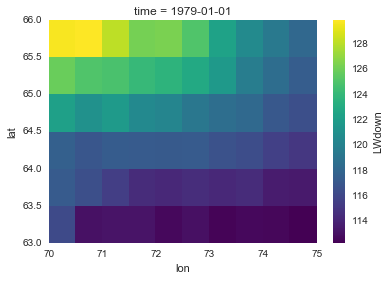

In [27]:
dt = xr.open_dataset('../LWdown_daily_WFDEI/LWdown_daily_WFDEI_197901_201412.nc', decode_times=False)
dt['time'] = pd.date_range('1979-01-01', '2014-12-31', name='time')
data2d = dt.LWdown.sel(lon=slice(70, 75), lat=slice(63, 66), time='1979-01-01')
data2d.plot()